<a href="https://colab.research.google.com/github/AndyGoncalves/Regressao_linear/blob/main/Github_saudemental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema: Saúde Mental 
Desafio de Inferência Tera - jun/2022; 
Resolução de TAMY TSUJIMOTO; adaptado e comentado por mim.  

Perguntas de norteamento:

* Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

* Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

In [1]:
#conectar ao Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Contextualização:


*   Problema:
*   Lógica raciocínio:
*   Solução:
*   chave única: "SEQN"
*   Base de dados: 
        * DEMO_PHQ.csv: banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006.
        * PAG_HEI.csv: banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006.



## Definições

**Depressão**:

* Depression is a common mental disorder. Globally, it is estimated that 5% of  adults suffer from depression.
* Depression is a leading cause of disability worldwide and is a major * contributor to the overall global burden of disease.
* More women are affected by depression than men.
* Depression can lead to suicide.
* There is effective treatment for mild, moderate, and severe depression.
* Depression results from a complex interaction of social, psychological, and biological factors.
* **Exercise programmes for older persons can also be effective in depression prevention.**

Referência: https://www.who.int/news-room/fact-sheets/detail/depression

O **National Health and Nutrition Examination Survey (NHANES)** é uma pesquisa anual conduzida pelo National Center for Health Statistics (NCHS) do Centro de Controle e Prevenção de Doenças (Centers for Disease Control - CDC) para avaliar a saúde e nutrição de adultos e crianças dos Estados Unidos.


Referência: https://www.cdc.gov/nchs/nhanes/index.htm

O **Patient Health Questionnaire-9 (PHQ-9)** é um instrumento utilizado para avaliar o grau de depressão em pacientes.

Referência: https://www.mdcalc.com/calc/1725/phq9-patient-health-questionnaire9#pearls-pitfalls

## Pré Tratamento

Importando os pacotes necessários para a análise:

In [2]:
import pandas as pd                #biblioteca para análises
import numpy as np                 #biblioteca para operações numéricas
import seaborn as sns              #biblioteca para visualização harmônica
import matplotlib.pyplot as plt    #biblioteca para visualização prática

Leitura dos bancos de dados:

In [3]:
demo = pd.read_csv('/content/drive/MyDrive/CASES_GITHUB/1_Inference_challenge_TERA/DEMO_PHQ.csv')
pag_hei = pd.read_csv('/content/drive/MyDrive/CASES_GITHUB/1_Inference_challenge_TERA/PAG_HEI.csv')

In [4]:
demo.info() # 5334 observações de adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [5]:
#visualizar carregamento dos dados
demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [6]:
pag_hei.info() # 9424 observações de crianças e adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [7]:
#visualizar carregamento dos dados
pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


Combinando banco de dados:

In [8]:
#Para a combinação dos dados foi utilizado o parâmetro 'left', no qual mantem o total de dados da base 'demo'(a esquerda do '.merge');
# A chave de união foi a variável 'SEQN' encontrada em ambos. Caso a chave não tivesse nome iguais, seria preciso modificar, ou especificar no parâmetro.

db = demo.merge(pag_hei, on = 'SEQN', how = 'left')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

### Tratamento das variáveis

Avaliando o percentual de casos faltantes (missing):

In [9]:
#isnull()mostrará se apresenta valor falso ou não.
#mean() vai somar todos os nulos e dividir pelo total de observações da coluna. 
#sort_values organiza os valores encontrados de forma decrescente. 
#round(4)*100 vai arredondar e transformar em percentual. 
db.isnull().mean().sort_values(ascending = False).round(4)*100

DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
DPQ010                      9.34
HEI2015_TOTAL_SCORE         5.14
HEI2015C1_TOTALVEG          5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015C7_TOTPROT           5.14
INDFMINC                    0.88
SEQN                        0.00
ADHERENCE                   0.00
DMDEDUC                     0.00
RIDRETH1                    0.00
RIDAGEYR                    0.00
RIAGENDR                    0.00
PAG_MINW  

Medidas resumo das variáveis quantitativas:

In [10]:
#Excluir a coluna chave 'SEQN' porque ela não apresenta informações significativas, além do uso para a união das tabelas. 
#Visualizar quantativamente as faixas de distribuição dos dados. 
db.drop(columns=['SEQN']).describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,...,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,...,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,...,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,...,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


Avaliando frequências das variáveis qualitativas:

Distribuição dos escores para PHQ9

In [11]:
#frequências 
# 0 = “nenhuma vez” 
# 1 = “menos de uma semana”
# 2 = “uma semana ou mais” 
# 3 = “quase todos os dias”

#DataFrame.agg([contar quantas vezes aparece])

db[[
"DPQ010",
"DPQ020",
"DPQ030",
"DPQ040",
"DPQ050",
"DPQ060",
"DPQ070",
"DPQ080",
"DPQ090"]].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


Distribuição de raça:

In [12]:
# RIDRETH1 com códigos errados no desafio
# 1	Mexican American	
# 2	Other Hispanic
# 3	Non-Hispanic White	
# 4	Non-Hispanic Black	
# 5	Other Race - Including Multi-Racial

#oBS: Há poucos valores no 2 e 5; motivo que serão agregados. 
db[["RIDRETH1"]].value_counts(sort = False)



RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64

Distribuição de escolaridade:

In [13]:
# 1 = Menor que 9o ano
# 2 = 9-12o ano
# 3 = Ensino médio
# 4 = Ensino superior incompleto
# 5 = Superior completo ou maior
# 7 = Se recusou a responder
# 9 = Não sabe

db[["DMDEDUC"]].value_counts(sort = False)

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64

Distribuição de renda:

In [14]:
# "INDFMINC" = Renda anual familiar (US$). 
# O salário mínimo EUA é definido por hora. Em 2006, 40 horas semanais equivaleriam aprox.$900,00 mês; e $11 mil anual.

#Conforme dicionário já veio divido em classes:
# 1 = 0-4999
# 2 - 5000-9999
# 3 = 10000-14999 # próximo ao mínimo(40 horas semanais).
# 4 = 15000-19999
# 5 = 20000-24999
# 6 = 25000-34999
# 7 = 35000-44999
# 8 = 45000-54999
# 9 = 55000-64999
# 10 = 65000-74999  
# 11 = Maior ou igual a 75000
# 12 = Maior que 20000
# 13 = Menor que 20000
# 77 = Se recusou a responder
# 99 = Não sabe

db[["INDFMINC"]].value_counts(sort = False)

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64

Distribuição de grupo de aderência:

In [15]:
#ADHERENCE - Grupo de aderência ao Physical Activity Guideline (PAG)
# Frequência de prática de atividade física. 

# 1 = Baixo (< 150 min/semana)
# 2 = Adequado (150-300 min/semana)
# 3 = Acima (> 300 min/semana)

db[["ADHERENCE"]].value_counts(sort = False)

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64

In [16]:
#7 = Se recusou a responder  e 9 = Não sabe - serão substituidos por np.nan. 
#RIDRETH1 Raça/Etnia  5 = Outro/Hispânico - será substituído por 4 = Outro
#Recategorizando a variável INDFMINC com o ponto médio de cada categoria - objetivo: analisar como variável quantitativa

replace_map = {
  "DPQ010": {7: np.nan, 9: np.nan},
  "DPQ020": {7: np.nan, 9: np.nan},
  "DPQ030": {7: np.nan, 9: np.nan},
  "DPQ040": {7: np.nan, 9: np.nan},
  "DPQ050": {7: np.nan, 9: np.nan},
  "DPQ060": {7: np.nan, 9: np.nan},
  "DPQ070": {7: np.nan, 9: np.nan},
  "DPQ080": {7: np.nan, 9: np.nan},
  "DPQ090": {7: np.nan, 9: np.nan},
  "DMDEDUC": {7: np.nan, 9: np.nan},
  "RIDRETH1": {5: 2}, # Other  (valor foi unido porque a distribuição individual era baixa se comparada aos outros)
  "INDFMINC": {1: np.mean([0,4999]), 
               2: np.mean([5000,9999]), 
               3: np.mean([10000,14999]),
               4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),
               6: np.mean([25000,34999]), 
               7: np.mean([35000,44999]), 
               8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 
               10: np.mean([65000,74999]), 
               11: 75000, # 11 = Maior ou igual a 75000
               12: np.mean([20000, 90000]),  # 12 = Maior que 20000
               13: np.mean([0, 19999]), # 13 = Menor que 20000
               77: np.nan, 99: np.nan} 
}

replace_map

{'DPQ010': {7: nan, 9: nan},
 'DPQ020': {7: nan, 9: nan},
 'DPQ030': {7: nan, 9: nan},
 'DPQ040': {7: nan, 9: nan},
 'DPQ050': {7: nan, 9: nan},
 'DPQ060': {7: nan, 9: nan},
 'DPQ070': {7: nan, 9: nan},
 'DPQ080': {7: nan, 9: nan},
 'DPQ090': {7: nan, 9: nan},
 'DMDEDUC': {7: nan, 9: nan},
 'RIDRETH1': {5: 2},
 'INDFMINC': {1: 2499.5,
  2: 7499.5,
  3: 12499.5,
  4: 17499.5,
  5: 22499.5,
  6: 29999.5,
  7: 39999.5,
  8: 49999.5,
  9: 59999.5,
  10: 69999.5,
  11: 75000,
  12: 55000.0,
  13: 9999.5,
  77: nan,
  99: nan}}

In [17]:
# Quando dict é usado como o valor to_replace, é como se as chaves no dict fossem a parte to_replace e os valores no dict fossem o parâmetro value.
# Foi criado nova variável com as transformações "db2".
db2 = db.replace(replace_map)

### Construção das variáveis

Checando casos faltantes para as variáveis do phq9:

In [18]:
#faltantes representam menos de 10%.

db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090"]].isnull().mean()

DPQ010    0.095051
DPQ020    0.094301
DPQ030    0.094676
DPQ040    0.094301
DPQ050    0.094113
DPQ060    0.094301
DPQ070    0.094113
DPQ080    0.095051
DPQ090    0.093738
dtype: float64

Construindo variável phq9:

In [19]:
#Crio uma nova coluna de nome "phq9" no dataframe 'db2'.
# Essa nova coluna é o somatário das colunas 010 a 090. 
# o Default do pandas.DataFrame.sum é skipna : boolean, default True; isto é, Exclua os valores NA/nulos.  
# No somatório dos valores das colunas, se uma linha/coluna inteira for NA, o resultado será NA. 
# Como há menos de 10%, os NAs serão mantidos. 

db2["phq9"] = db2[["DPQ010", 
                   "DPQ020", 
                   "DPQ030", 
                   "DPQ040", 
                   "DPQ050", 
                   "DPQ060", 
                   "DPQ070", 
                   "DPQ080", 
                   "DPQ090"]].sum(axis = 'columns', skipna = False)

db2["phq9"]

0        NaN
1        0.0
2        0.0
3        0.0
4        4.0
        ... 
5329     2.0
5330    10.0
5331     2.0
5332     0.0
5333     4.0
Name: phq9, Length: 5334, dtype: float64

In [20]:
db2[["DPQ010", 
     "DPQ020", 
     "DPQ030", 
     "DPQ040",
     "DPQ050", 
     "DPQ060", 
     "DPQ070", 
     "DPQ080", 
     "DPQ090",
     "phq9"]].head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,phq9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0


Construindo variável phq_grp:

In [21]:
# usando a biblioteca numpy as np
# a variável phq_grp é uma transformação categorica ordinal 
# grupo de sintomas de depressão que assume:
# 0 : (“sem sintomas”) se  phq9 < 5
# 1 : (“sintomas leves”) se 5 <= phq9 < 10
# 2 : (“sintomas moderados”) se 10 <= phq9 < 15
# 3 : (“sintomas moderadamente severos”) se 15 <= phq9 < 19 
# 4 : (“sintomas severos”) se phq9 >= 20

conditions = [
  (db2['phq9'].isna()),
  (db2['phq9'] <= 5),
  (db2['phq9'] > 5) & (db2['phq9'] <= 9),
  (db2['phq9'] > 9) & (db2['phq9'] <= 14),
  (db2['phq9'] > 14) & (db2['phq9'] <= 19),
  (db2['phq9'] > 19)
    ]
values = [np.nan, 0, 1, 2, 3, 4]

# em np.select, as duas listas precisam ter o mesmo tamanho
db2["phq_grp"] = np.select(conditions, values) # Construindo variável

db2[["phq_grp"]].value_counts(sort = False) # Avaliando frequência
# .value_counts possui como dropnabool, default True; isto é "Don’t include counts of NaN.""

phq_grp
0.0        4013
1.0         489
2.0         201
3.0          73
4.0          23
dtype: int64

Podemos construir novas variáveis a partir da variável phq_grp:

In [22]:
# Para melhorar a distribuição, será reduzido o número de categorias.
# Agrupando phq_grp em 0 = Sem sintomas, 1 = Sintomas leves, 2 = Sintomas moderados a severos

db2["phq_grp2"] = db2["phq_grp"].replace([3, 4], 2) # substitui na coluna 'phq_grp' tudo que for 3 e 4, pelo número 2.

db2[["phq_grp2"]].value_counts(sort = False) # Avaliando frequencia

phq_grp2
0.0         4013
1.0          489
2.0          297
dtype: int64

1) Para as etapas de análise exploratória e teste de hipótese, utilizaremos a variável phq_grp2 com 3 níveis de sintomas de depressão.

2) Como o percentual de missing está abaixo de 10% para todas as variáveis, seguiremos a análise utilizando apenas os dados completos.

## EDA: Análise Univariada

In [23]:
#Para facilitar a análise, deixe as variáveis agrupadas por tipo.

#quantitativas
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_MINW", 
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "phq9"]

#qualitativas
var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    "phq_grp2"
]

#dicionários úteis para gerar gráficos
label_quali = {
  "RIAGENDR": {1: 'Masculino', 
               2: 'Feminino'},
  "RIDRETH1": {1: 'Americano Mexicano', 
               2: 'Outro', 
               3: 'Branco \n não hispânico', 
               4: 'Negro \n não hispânico'},
  "DMDEDUC": {1: "< 9 ano", 
              2: "9-12 ano", 
              3: "Ensino \n médio", 
              4: "Superior \n incompleto", 
              5: "Superior \n completo"},
  "ADHERENCE": {1: 'Baixo', 
                2: 'Adequado', 
                3: 'Acima'},
  "phq_grp2": {0: "Sem sintomas", 
               1: "Sintomas \n leves", 
               2: "Sintomas \n moderados-severos"}
}

In [24]:
db2[var_quant].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9
count,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,4799.00
mean,45.09,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97,2.73
std,20.15,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32,3.73
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,0.00
25%,27.00,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03,0.00
50%,43.00,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51,1.00
75%,62.00,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17,4.00
95%,81.00,75000.00,1863.05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19,10.00
99%,85.00,75000.00,3672.06,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86,17.00
max,85.00,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53,27.00


PAG_MINW = Tempo total semanal de atividade aeróbica moderada-
vigorosa em minutos segundo o Physical Activity Guideline (PAG)

De acordo com o guia "Key Guidelines for Adults" 
*For substantial health benefts, adults should do at least 150 minutes (2 hours and 30 minutes) to 300 minutes (5 hours) a week of moderate-intensity, or 75 minutes (1 hour and 15 minutes) to 150 minutes (2 hours and 30 minutes) a week of vigorous-intensity aerobic physical activity, or an equivalent combination of moderate- and vigorous-intensity aerobic activity. Preferably, aerobic activity should be spread throughout the week.* (página 8)
Referência: https://health.gov/sites/default/files/2019-09/Physical_Activity_Guidelines_2nd_edition.pdf

Dado que uma semana tem no máximo 168 horas (10080 minutos) o valor máximo de PAG_MINW não parece ser um valor possível. Nesse caso, iremos truncar o valor de PAG_MINW em 3600 minutos (60h semanais), aproximadamente 8 horas diárias.


In [25]:
db2['PAG_MINW_trunc'] = np.where(db2['PAG_MINW'] > 3600, 3600, db2['PAG_MINW'])

db2[['PAG_MINW', 'PAG_MINW_trunc']].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_MINW_trunc
count,5334.00,5334.00
mean,471.77,454.86
std,780.35,663.05
min,0.00,0.00
25%,35.00,35.00
50%,210.00,210.00
75%,568.93,568.93
95%,1863.05,1863.05
99%,3672.06,3600.00
max,10777.83,3600.00


Podemos transformar a variável PAG_MINW em horas:

In [26]:
db2["PAG_HRW"] = db2["PAG_MINW_trunc"]/60

### **Editando as cores dos gráficos**

In [106]:
blue,purple,red,pink=sns.blend_palette(["blue","purple","red","pink"], 4)

In [50]:
blue

(0.0, 0.0, 1.0)

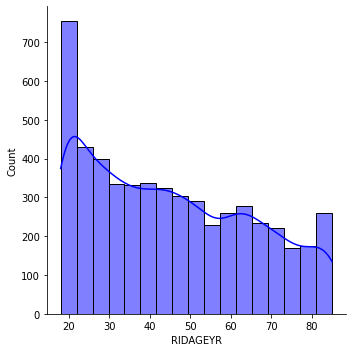

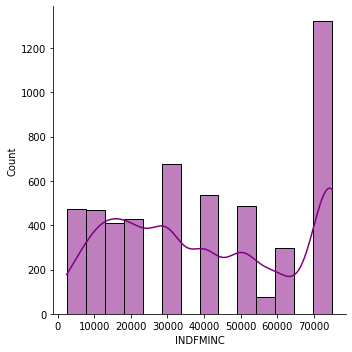

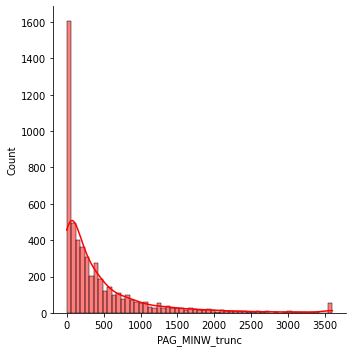

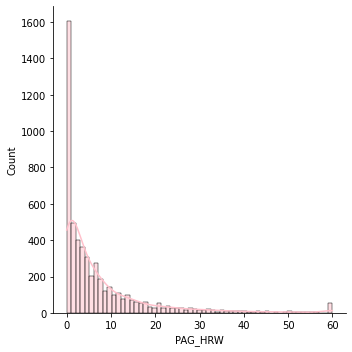

In [51]:
sns.displot(db2, x="RIDAGEYR", kde=True, color=blue)
sns.displot(db2, x="INDFMINC", kde=True,  color=purple)
sns.displot(db2, x="PAG_MINW_trunc", kde=True,  color=red)
sns.displot(db2, x="PAG_HRW", kde=True,  color=pink)
plt.show()

Ao analisar a distribuição dos dados, caldas mais longas representam------

Como a variável PAG_HRW é bastante assimétrica, podemos também criar uma versão com o log:

In [54]:
db2["PAG_HRW_log"] = np.log(db2["PAG_HRW"] + 1)

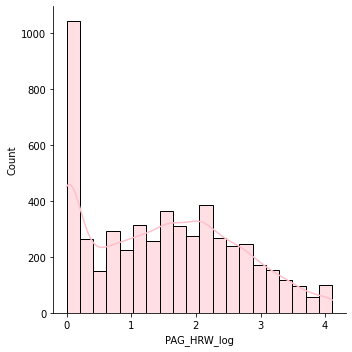

In [55]:
sns.displot(db2, x="PAG_HRW_log", kde=True, color=pink)
plt.show()

In [66]:
import matplotlib.pyplot as plt

In [99]:
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", palette=sns.blend_palette(["blue","purple","red","pink"], 6)))
    plt.ylim(0,1)
    plt.show()

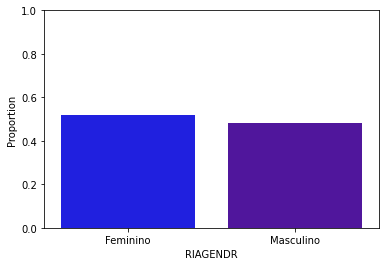

In [100]:
grafico_barras_prop(db2.replace(label_quali), variable = "RIAGENDR")

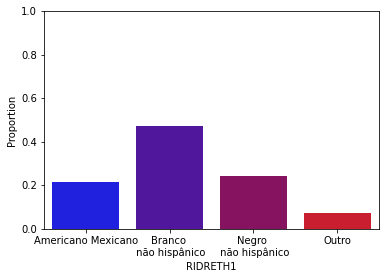

In [101]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "RIDRETH1")

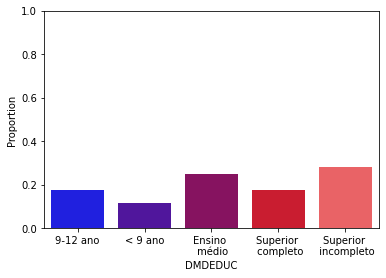

In [102]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "DMDEDUC")

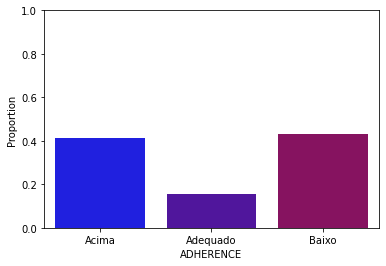

In [103]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "ADHERENCE")

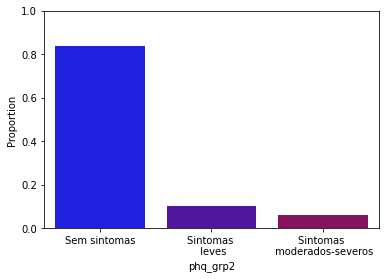

In [104]:
grafico_barras_prop(db2.replace(label_quali), 
                    variable = "phq_grp2")

## EDA: Análise Bivariada + Teste de Hipóteses

Função para construir gráficos boxplot para uma variável quantitativa versus grupo de depressão

In [107]:
# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp2", y=variable, data=data,  palette=sns.blend_palette(["blue","purple","red","pink"], 6))
    plt.ylabel(label)
    plt.show()

### A) Perfil com maiores incidências de sintomas de depressão

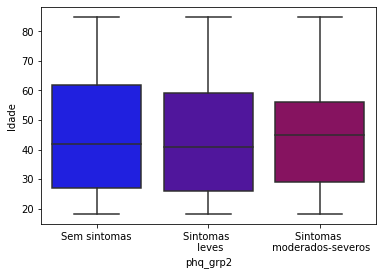

In [108]:
grafico_boxplot_grp(db2.replace(label_quali), "RIDAGEYR", "Idade")

Teste de hipóteses:

Neste caso queremos comparar a média de idade para os três grupos de sintomas de depressão. Sendo assim, o teste F da ANOVA será utilizado. Neste teste, decidimos entre a hipótese nula "Não existe diferença entre os grupos de depressão com relação à média de idade" e a hipótese alternativa "Existe pelo menos uma diferença na média de idade entre os grupos de sintomas de depressão".

In [109]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "RIDAGEYR"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["RIDAGEYR"],
                   db_aux[(db_aux.phq_grp2 == 1)]["RIDAGEYR"],
                   db_aux[(db_aux.phq_grp2 == 2)]["RIDAGEYR"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.002, p=0.367


O valor-p do teste foi p = 0.367. Interpretação do valor-p: Se a hipótese nula fosse verdadeira, qual a probabilidade de observarmos as diferenças que estamos observando na amostra?

Neste caso, a probabilidade é alta (p = 0.367), ou seja, o que estamos observando na amostra é algo bem provável de ocorrer se a hipótese nula for verdadeira e, portanto, não temos indícios para rejeitar a hipótese nula. Sendo assim, não conseguimos detectar uma diferença estatisticamente significativa entre os grupos de depressão com relação à media de idade.

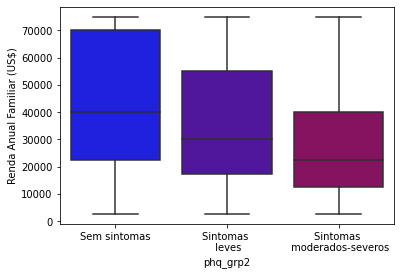

In [110]:
grafico_boxplot_grp(db2.replace(label_quali), "INDFMINC", "Renda Anual Familiar (US$)")

Teste de hipóteses:

In [111]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "INDFMINC"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 1)]["INDFMINC"],
                   db_aux[(db_aux.phq_grp2 == 2)]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.376, p=0.000


Neste caso estamos testando a hipótese nula "Não existe diferença entre os grupos de depressão com relação à renda média". Como p < 0.05, temos que a probabilidade de observarmos o que estamos observando nesta amostra é baixa (próxima de zero) se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira (rejeitamos a hipótese nula).

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas com relação a renda média, iremos realizar comparações multiplas para investigar quais diferenças são signiticativas:

In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['INDFMINC'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   0.0    1.0  -5537.0284 0.001  -8305.9614  -2768.0954   True
   0.0    2.0 -13537.8408 0.001 -16971.2327 -10104.4489   True
   1.0    2.0  -8000.8124 0.001 -12223.0265  -3778.5983   True
--------------------------------------------------------------


Com as comparações múltiplas, estamos realizando três testes de hipótese simultaneamente. Por conta disso, a função ajusta o valor-p para que o erro máximo desde conjunto de teste de hipóteses seja no máximo alpha = 0.05.

Teste 1: Grupo 0 (Sem sintomas) x Grupo 1 (sintomas leves) -> p = 0.001

Teste 2: Grupo 0 (Sem sintomas) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

Teste 3: Grupo 1 (sintomas leves) x Grupo 2 (sintomas moderados-severos) -> p = 0.001

Neste caso, rejeitamos todas as hipóteses nulas. Sendo assim, temos indícios de que:

A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas leves
A renda média do grupo Sem sintomas é diferente da renda média do grupo de sintomas moderados-severos
A renda média do grupo sintomas leves é diferente da renda média do grupo sintomas moderados-severos

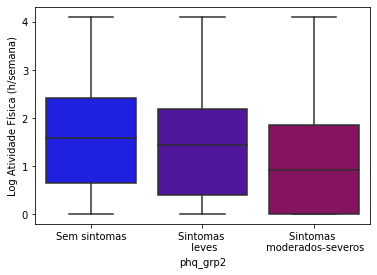

In [113]:
grafico_boxplot_grp(db2.replace(label_quali), "PAG_HRW_log", "Log Atividade Física (h/semana)")

In [114]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "PAG_HRW_log"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.phq_grp2 == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=31.185, p=0.000


In [115]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.1483 0.0157 -0.2739 -0.0226   True
   0.0    2.0  -0.5119  0.001 -0.6697 -0.3542   True
   1.0    2.0  -0.3636  0.001 -0.5566 -0.1707   True
----------------------------------------------------


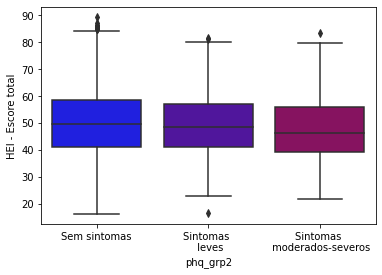

In [116]:
grafico_boxplot_grp(db2.replace(label_quali), "HEI2015_TOTAL_SCORE", "HEI - Escore total")

In [117]:
from scipy.stats import f_oneway

db_aux = db2[["phq_grp2", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.phq_grp2 == 0)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.phq_grp2 == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=7.119, p=0.001


In [118]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['phq_grp2'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.1066 0.1546 -2.5111  0.2978  False
   0.0    2.0  -2.5846 0.0017  -4.348 -0.8211   True
   1.0    2.0  -1.4779 0.2437 -3.6364  0.6805  False
----------------------------------------------------


### B) Perfil de hábitos saudáveis

Alimentação saudável x Exercícios Físicos

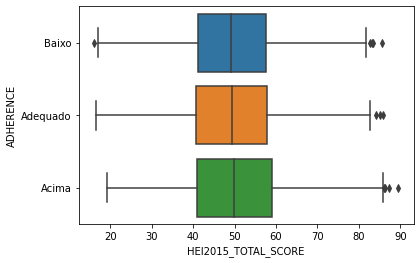

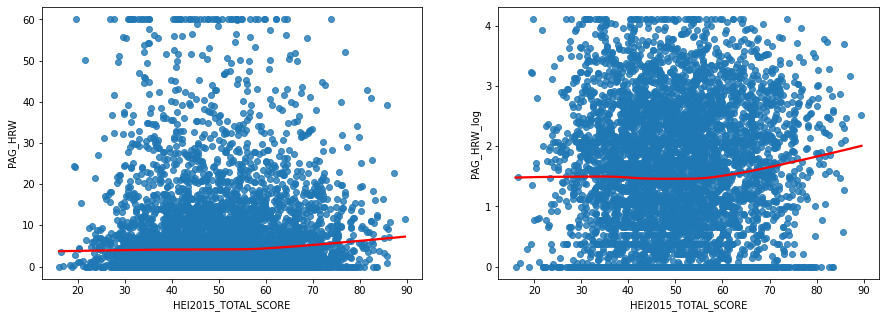

In [119]:
sns.boxplot(y="ADHERENCE", 
            x="HEI2015_TOTAL_SCORE", 
            orient="h",
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[0])

sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'PAG_HRW_log', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = db2,
            ax = ax[1])
plt.show()

In [120]:
from scipy.stats import f_oneway

db_aux = db2[["ADHERENCE", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.ADHERENCE == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.ADHERENCE == 3)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=4.122, p=0.016


In [121]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['ADHERENCE'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.3937 0.7031  -0.805 1.5924  False
   1.0    3.0   1.0773  0.012  0.1931 1.9616   True
   2.0    3.0   0.6837  0.378 -0.5186 1.8859  False
---------------------------------------------------


Hábitos saudáveis x Gênero

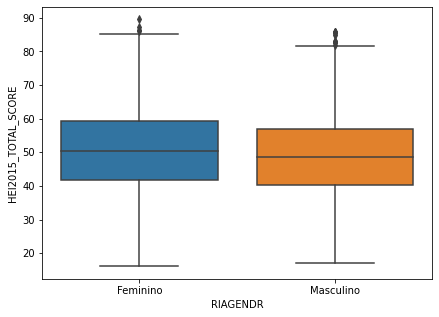

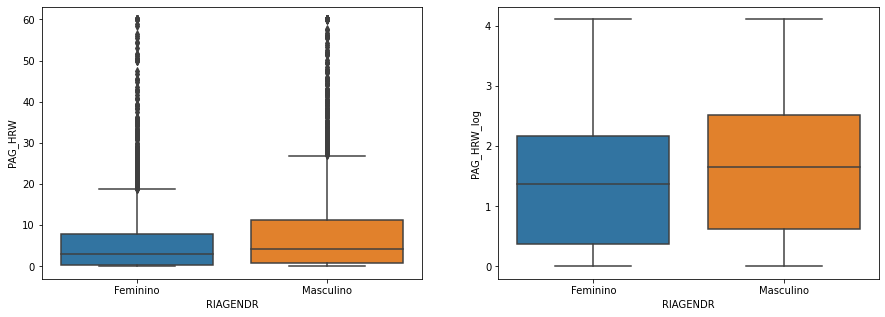

In [122]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIAGENDR", 
            y="HEI2015_TOTAL_SCORE", 
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW", 
            data=db2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIAGENDR", 
            y="PAG_HRW_log", 
            data=db2.replace(label_quali),
            ax = ax[1])
plt.show()

In [123]:
from scipy.stats import f_oneway

db_aux = db2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=27.216, p=0.000


In [124]:
from scipy.stats import f_oneway

db_aux = db2[["RIAGENDR", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIAGENDR == 2)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=50.329, p=0.000


Hábitos saudáveis e Raça

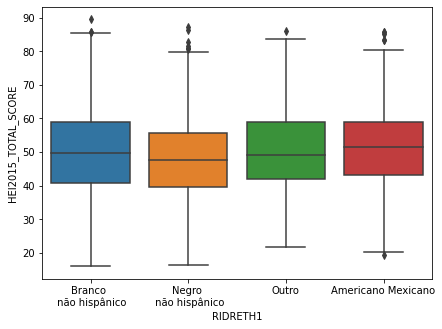

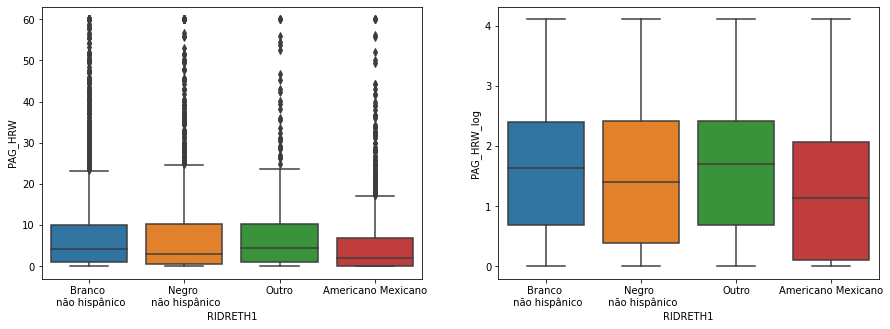

In [125]:
plt.figure(figsize=(7,5))
sns.boxplot(x="RIDRETH1", 
            y="HEI2015_TOTAL_SCORE", 
            data=db2.replace(label_quali))
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW", 
            data=db2.replace(label_quali),
            ax = ax[0])

sns.boxplot(x="RIDRETH1", 
            y="PAG_HRW_log", 
            data=db2.replace(label_quali),
            ax = ax[1])
plt.show()

In [126]:
from scipy.stats import f_oneway

db_aux = db2[["RIDRETH1", "PAG_HRW", "PAG_HRW_log", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=11.860, p=0.000


In [127]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['HEI2015_TOTAL_SCORE'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.964  0.556 -2.8709   0.943  False
     1      3  -1.0955 0.0718 -2.2542  0.0632  False
     1      4  -2.9767  0.001 -4.2992 -1.6541   True
     2      3  -0.1315    0.9 -1.8988  1.6357  False
     2      4  -2.0127 0.0302 -3.8914  -0.134   True
     3      4  -1.8812  0.001 -2.9928 -0.7696   True
----------------------------------------------------


In [128]:
from scipy.stats import f_oneway

stat, p = f_oneway(db_aux[(db_aux.RIDRETH1 == 1)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 2)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 3)]["PAG_HRW_log"],
                   db_aux[(db_aux.RIDRETH1 == 4)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=25.845, p=0.000


In [130]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PAG_HRW_log'],
                  db_aux['RIDRETH1'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.3757  0.001  0.2016  0.5499   True
     1      3   0.3502  0.001  0.2444   0.456   True
     1      4    0.229  0.001  0.1082  0.3498   True
     2      3  -0.0255    0.9 -0.1869  0.1359  False
     2      4  -0.1467 0.1241 -0.3183  0.0248  False
     3      4  -0.1212 0.0116 -0.2227 -0.0197   True
----------------------------------------------------


fim